In [20]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

H = lambda x,y: -2*(x**2+y**2)+0.5*(x**4+y**4)+0.5*(x-y)**4

几率分布exp(-H)绘图：

In [21]:
#data prepare for plot
plot_bounds=[[-3, 3],[-3, 3]]
n_mesh=100
x = np.linspace(*plot_bounds[0], n_mesh)
y = np.linspace(*plot_bounds[1], n_mesh)
xx, yy = np.meshgrid(x, y)
X = np.array([xx.ravel(), yy.ravel()]).T
Z = np.exp(-1*H(X[:,0],X[:,1]))

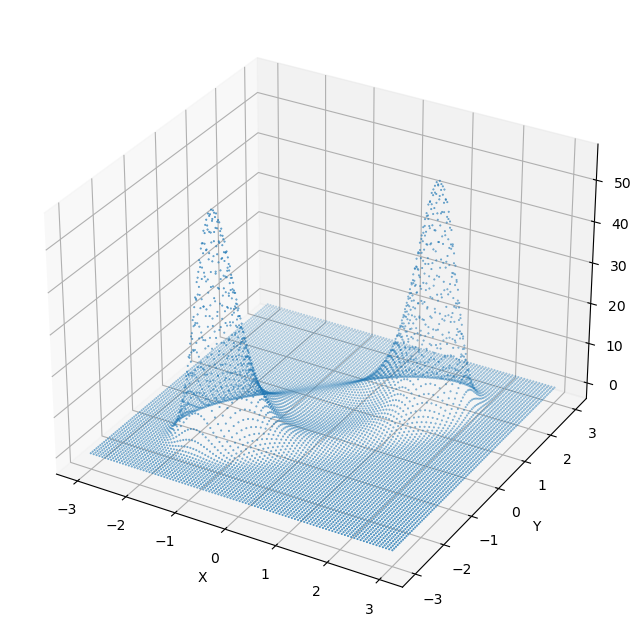

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X[:,0], X[:,1], Z, s=0.2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

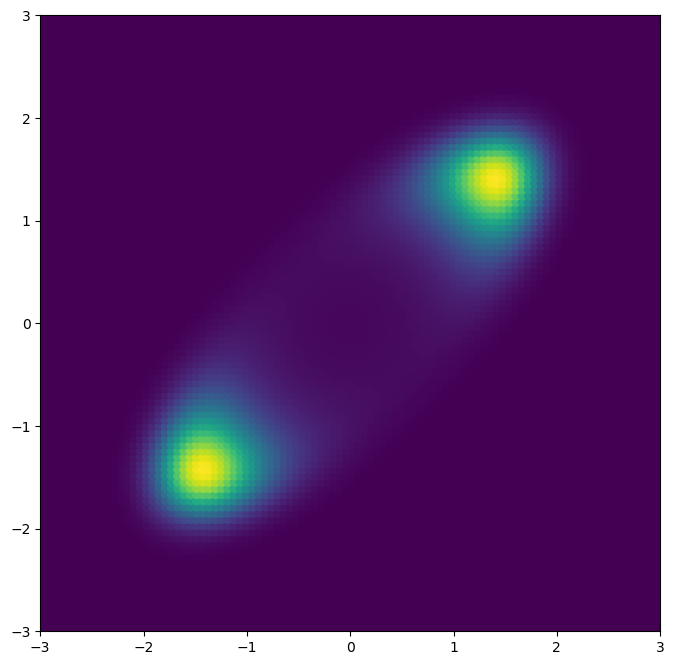

In [23]:
plt.figure(figsize=(8, 8))
ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=Z)
plt.xlim(*plot_bounds[0])
plt.ylim(*plot_bounds[1])
plt.show()

MetropolisMonteCarlo算法

In [24]:
class MetropolisMonteCarlo:
    def __init__(
            self, 
            hamilton, 
            beta=1.0, 
            amplitude=0.1, 
            max_iter=500,
        ):
        self.energy = hamilton
        self.beta = beta
        self.amplitude = amplitude
        self.n_iter = max_iter
        self.store_history = []

    def perturb(self, X):
        Xp = X + self.amplitude * np.random.normal(size=X.shape)
        return Xp

    def update(self, X):
        rho = np.random.random(X.shape[0])
        Xp = self.perturb(X)
        e_delta = self.energy(Xp[...,0],Xp[...,1]) - self.energy(X[...,0],X[...,1])

        # Create vector of update or not

        do_update = np.zeros(X.shape[0])
        do_update[e_delta < 0] = 1
        do_update[rho < np.exp(-self.beta * e_delta)] = 1

        X_out = X.copy()
        X_out[do_update == 1] = Xp[do_update == 1]
        return X_out

    def fit(self, X):
        np.random.seed(1)
        self.history = [X]
        for _ in range(self.n_iter):
            X = self.update(X)
            self.history.append(X)
        return X

In [25]:
#计算题目中所要求的数值
def calculate(X):
    x = X[...,0].ravel()
    y = X[...,1].ravel()
    x2 = np.sum(x**2)/len(x)
    y2 = np.sum(y**2)/len(x)
    xy2 = np.sum(x**2+y**2)/len(x)
    print("<x**2>={}, <y**2>={}, <x**2+y**2>={}".format(x2,y2,xy2))

不同beta 运行

In [26]:
optimizer = MetropolisMonteCarlo(H, beta=0.2)

np.random.seed(0)
X0 = np.random.normal(loc=(0, 0.5), size=(10, 2))

# Fit optimizer
Xopt = optimizer.fit(X0.copy()).squeeze()
Xs = np.array(optimizer.history).squeeze()
calculate(Xs)

<x**2>=1.455290475653293, <y**2>=1.8098633369635564, <x**2+y**2>=3.265153812616849


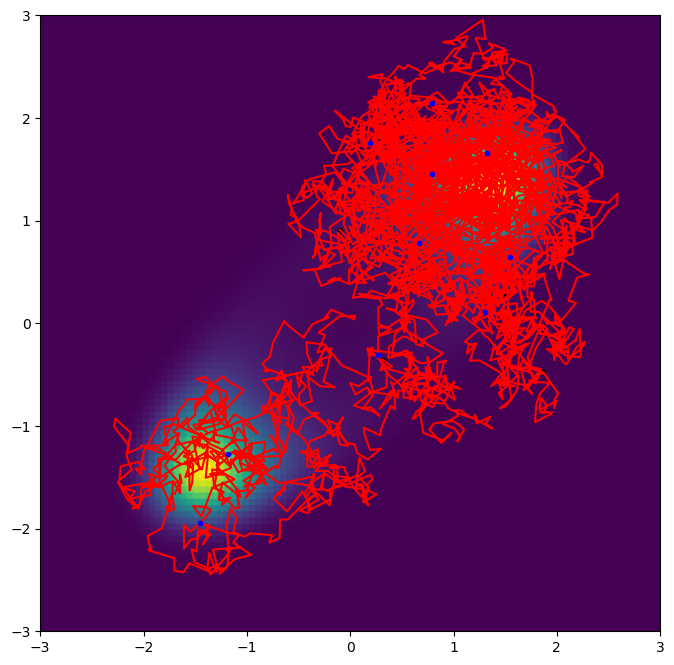

In [27]:
plt.figure(figsize=(8, 8))
ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=Z)
plt.plot(Xs[0, :, 0], Xs[0, :, 1], '.k');
plt.plot(Xs[:, :, 0], Xs[:, :, 1], 'r');
plt.plot(Xs[-1, :, 0], Xs[-1, :, 1], '.b');
plt.xlim(*plot_bounds[0])
plt.ylim(*plot_bounds[1])
plt.show()

<x**2>=1.605393309205096, <y**2>=1.658350968802688, <x**2+y**2>=3.263744278007784


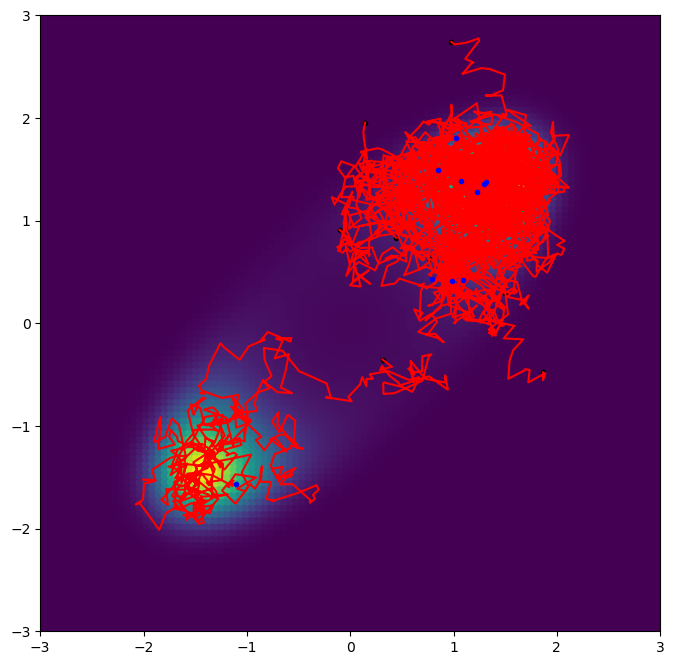

In [28]:
optimizer = MetropolisMonteCarlo(H, beta=1)

np.random.seed(0)
X0 = np.random.normal(loc=(0, 0.5), size=(10, 2))

# Fit optimizer
Xopt = optimizer.fit(X0.copy()).squeeze()
Xs = np.array(optimizer.history).squeeze()
calculate(Xs)
plt.figure(figsize=(8, 8))
ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=Z)
plt.plot(Xs[0, :, 0], Xs[0, :, 1], '.k');
plt.plot(Xs[:, :, 0], Xs[:, :, 1], 'r');
plt.plot(Xs[-1, :, 0], Xs[-1, :, 1], '.b');
plt.xlim(*plot_bounds[0])
plt.ylim(*plot_bounds[1])
plt.show()

<x**2>=1.8629292944861748, <y**2>=1.905720076485794, <x**2+y**2>=3.7686493709719695


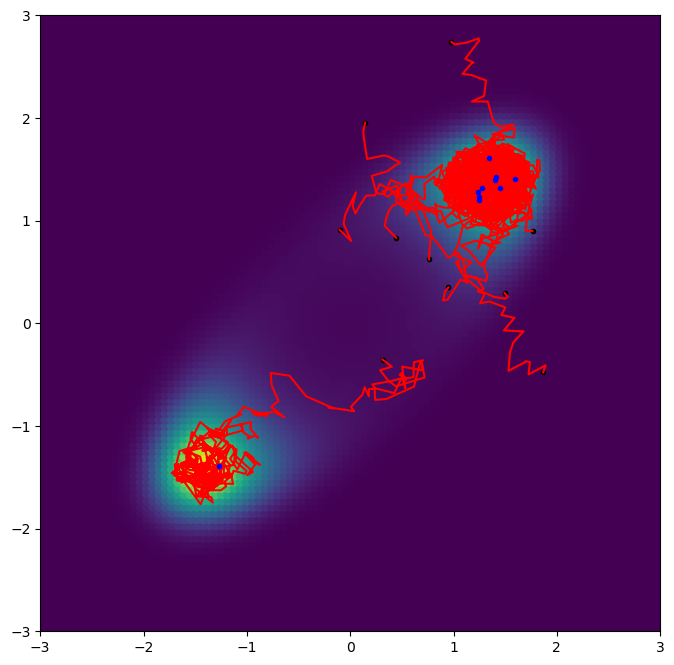

In [29]:
optimizer = MetropolisMonteCarlo(H, beta=5)

np.random.seed(0)
X0 = np.random.normal(loc=(0, 0.5), size=(10, 2))

# Fit optimizer
Xopt = optimizer.fit(X0.copy()).squeeze()
Xs = np.array(optimizer.history).squeeze()
calculate(Xs)
plt.figure(figsize=(8, 8))
ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=Z)
plt.plot(Xs[0, :, 0], Xs[0, :, 1], '.k');
plt.plot(Xs[:, :, 0], Xs[:, :, 1], 'r');
plt.plot(Xs[-1, :, 0], Xs[-1, :, 1], '.b');
plt.xlim(*plot_bounds[0])
plt.ylim(*plot_bounds[1])
plt.show()